# Data Preprocessing

In [ ]:
# Import Statements
import os
import csv      
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import glob

In [ ]:
!git clone https://github.com/raghudv94/Data_Mining_dataset.git

Cloning into 'Data_Mining_dataset'...
remote: Enumerating objects: 255, done.
remote: Counting objects: 100% (255/255), done.
remote: Compressing objects: 100% (255/255), done.
remote: Total 255 (delta 5), reused 235 (delta 0), pack-reused 0
Receiving objects: 100% (255/255), 121.13 MiB | 16.39 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (242/242), done.


In [ ]:
file_path_products = 'Data_Mining_dataset/products_info.csv'
products_info= pd.read_csv(file_path_products, sep=',')

file_path_districts = 'Data_Mining_dataset/districts_info.csv'
districts_info= pd.read_csv(file_path_districts, sep=',')


In [ ]:
# Downloading and merging engagement data
file_path_engagement_data ='Data_Mining_dataset/engagement_data'
# The below line should be executed only once 
os.chdir("Data_Mining_dataset/engagement_data")



In [ ]:
# Takes 11 seconds
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
engagement_data = pd.concat([pd.read_csv(f) for f in all_filenames ])


In [ ]:
print(engagement_data.shape)
engagement_data.head()

(22324190, 4)


,time,lp_id,pct_access,engagement_index
0,2020-01-01,48165.0,0.05,2.36
1,2020-01-01,26488.0,0.38,69.91
2,2020-01-01,19181.0,0.47,85.03
3,2020-01-01,13496.0,0.05,0.47
4,2020-01-01,95731.0,1.42,138.88


In [ ]:
engagement_data.isna().sum()

time                      0
lp_id                   541
pct_access            13447
engagement_index    5378409
dtype: int64

In [ ]:
print(districts_info.shape)
districts_info.head()

(233, 7)


,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
districts_info.isna().sum()

district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64

In [ ]:
districts_info = districts_info.dropna(subset=['state'])
districts_info.isna().sum()

district_id                  0
state                        0
locale                       0
pct_black/hispanic           0
pct_free/reduced            28
county_connections_ratio    14
pp_total_raw                58
dtype: int64

In [ ]:
print(products_info.shape)
products_info.head()

(372, 6)


,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [ ]:
# splitting products last column into engagement and engagement_category 
products_info[['primary_function' , 'secondary_category_function']] = products_info['Primary Essential Function'].str.split('-', expand=True, n=1)
del products_info['Primary Essential Function']
# df[['First','Last']] = df.Name.str.split(expand=True)
products_info.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),primary_function,secondary_category_function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,LC,"Sites, Resources & Reference - Games & Simula..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC,Digital Learning Platforms


In [ ]:
#Checking all missing values in product data_frame

print(products_info.shape)
print(products_info.isna().sum())

(372, 7)
LP ID                           0
URL                             0
Product Name                    0
Provider/Company Name           1
Sector(s)                      20
primary_function               20
secondary_category_function    20
dtype: int64


merged_engagement_data -> combines all the districts' engagement data


new column - 'district_id'


takes 3.5 mins to execute


In [ ]:
merged_engagement_data = pd.DataFrame()
file_path='Data_Mining_dataset/engagement_data/'
for district in districts_info.district_id.iteritems():
  temp_file_path = str(district[1])+'.csv'
  temp = pd.read_csv(temp_file_path,sep=',')
  temp['district_id']=int(district[1])
  merged_engagement_data = merged_engagement_data.append(temp,ignore_index=True)

In [ ]:
temp = merged_engagement_data.groupby('lp_id')
#temp.get_group(10003.0)
temp.first()

,time,pct_access,engagement_index,district_id
lp_id,,,,
10003.0,2020-10-29,0.00,0.05,8815
10006.0,2020-10-13,0.00,0.07,9812
10024.0,2020-09-08,0.01,0.08,2393
10032.0,2020-06-24,0.02,0.19,8815
10035.0,2020-09-03,0.01,0.15,2598
...,...,...,...,...
99953.0,2020-08-21,0.00,0.36,8815
99968.0,2020-08-26,0.00,NaN,8815
99972.0,2020-08-27,0.00,0.02,4921


# **Exploratory Data Analysis**

Analysis focusing on the products and the providers for these products

In [ ]:
# We need to merge the product data and engagement data to determine the top 10 
# most used products. This is because, we need to make use of the field 
# "engagement_index" to determine how many times a resource has been accessed

# According to the documentation about the dataset on Kaggle, 
# What is an Engagement Index?
# Total page-load events per one thousand students of a given product and on a 
# given day. For example, if district A has an engagement index of 26666.66 for 
# product X on 2021-08-10, that means there were 26666.66 page-load events per 
# 1000 students for product X on 2021-08-10.

# Merging engagement data and product data
merged_engagement_and_product_data=merged_engagement_data.copy()
merged_engagement_and_product_data=merged_engagement_and_product_data.merge(products_info,left_on='lp_id',right_on='LP ID',how='left')
merged_engagement_and_product_data = merged_engagement_and_product_data.drop('LP ID', axis=1)
merged_engagement_and_product_data.head()


,time,lp_id,pct_access,engagement_index,district_id,URL,Product Name,Provider/Company Name,Sector(s),primary_function,secondary_category_function
0,2020-01-27,32213.0,100.00,3000.00,8815,https://classroom.google.com,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO,Learning Management Systems (LMS)
1,2020-02-25,90153.0,33.33,2666.67,8815,https://www.netflix.com/,Netflix,Netflix,PreK-12; Higher Ed; Corporate,LC,"Sites, Resources & Reference - Streaming Serv..."
2,2020-02-25,99916.0,0.00,NaN,8815,https://drive.google.com/start,Google Drive,Google LLC,PreK-12; Higher Ed; Corporate,LC/CM/SDO,Other
3,2020-02-25,28504.0,0.00,NaN,8815,http://google.com/sheets/about/,Google Sheets,Google LLC,PreK-12; Higher Ed; Corporate,LC/CM/SDO,Other
4,2020-02-25,95731.0,33.33,333.33,8815,http://docs.google.com/,Google Docs,Google LLC,PreK-12; Higher Ed; Corporate,LC,Content Creation & Curation


Determining the top ten providers of distance learning products during the pandemic

In [ ]:
top_providers=pd.DataFrame(merged_engagement_and_product_data.groupby('Provider/Company Name',dropna=False)['engagement_index'].sum()/1000000).reset_index()
top_providers=top_providers.sort_values('engagement_index',ascending=False)
top_providers=top_providers.fillna('Unknown')
top_providers.drop(top_providers.index[top_providers['Provider/Company Name'] == 'Unknown'], inplace=True)
top_providers=top_providers[0:10]
top_providers.head()

,Provider/Company Name,engagement_index
95,Google LLC,1291.141699
114,"Instructure, Inc.",97.668054
120,Kahoot! AS,66.488120
205,Schoology,27.769661
280,"ZOOM VIDEO COMMUNICATIONS, INC.",19.248529


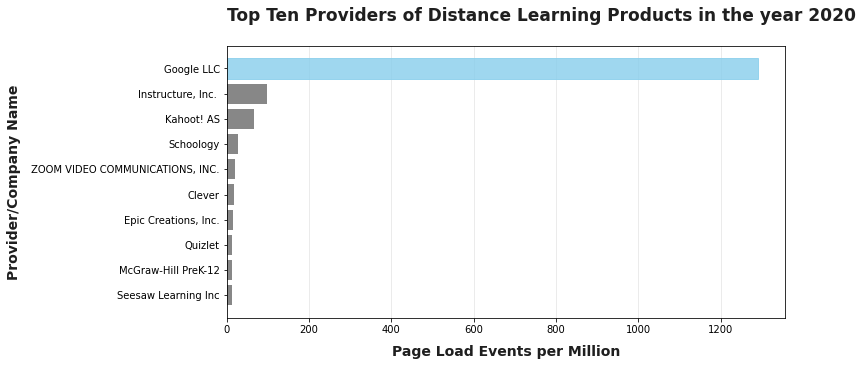

In [ ]:
top_providers = top_providers.sort_values('engagement_index')

fig, ax = plt.subplots(figsize=(10, 5))

top_ten_providers = ax.barh(top_providers['Provider/Company Name'], top_providers['engagement_index'], color='#696969', alpha=0.8)

top_ten_providers[9].set_color("#87CEEB")

ax.grid(axis='x', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Page Load Events per Million", fontsize=14, labelpad=10, color="#1F1F1F", fontweight='bold')
ax.set_ylabel("Provider/Company Name", fontsize=14, labelpad=10, color="#1F1F1F", fontweight='bold')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Top Ten Providers of Distance Learning Products in the year 2020", ha='left', x=xmin, y=ymax*1.1, fontsize=17, color="#1F1F1F", fontweight='bold')
plt.savefig('providers.png', dpi=300, bbox_inches='tight', pad_inches=.5)
plt.show()

Determining the top ten products used by schools for distance learning during the pandemic

In [ ]:
top_products=pd.DataFrame(merged_engagement_and_product_data.groupby('Product Name',dropna=False)['engagement_index'].sum()/1000000).reset_index()
top_products=top_products.sort_values('engagement_index',ascending=False)
top_products=top_products.fillna('Unknown')
top_products.drop(top_products.index[top_products['Product Name'] == 'Unknown'], inplace=True)
top_products=top_products[0:10]
top_products.head()

,Product Name,engagement_index
123,Google Docs,637.542113
121,Google Classroom,307.034881
349,YouTube,100.509698
39,Canvas,97.325492
197,Meet,74.302502


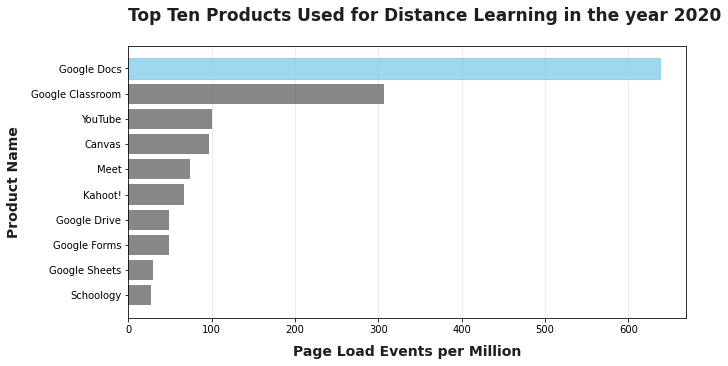

In [ ]:
top_products = top_products.sort_values('engagement_index')

fig, ax = plt.subplots(figsize=(10, 5))

top_ten_products = ax.barh(top_products['Product Name'], top_products['engagement_index'], color='#696969', alpha=0.8)

top_ten_products[9].set_color("#87CEEB")

ax.grid(axis='x', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Page Load Events per Million", fontsize=14, labelpad=10, color="#1F1F1F", fontweight='bold')
ax.set_ylabel("Product Name", fontsize=14, labelpad=10, color="#1F1F1F", fontweight='bold')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Top Ten Products Used for Distance Learning in the year 2020", ha='left', x=xmin, y=ymax*1.1, fontsize=17, color="#1F1F1F", fontweight='bold')
plt.savefig('products.png', dpi=300, bbox_inches='tight', pad_inches=.5)
plt.show()

In [ ]:
# Find pattern in engagement data 
# group engagement data by year and month and then plot time series 
# First try gruopinng by year and find engagement  then try month 

In [ ]:
import pandas as pd

merged_engagement_and_product_data['time'] = pd.to_datetime(merged_engagement_and_product_data['time'])

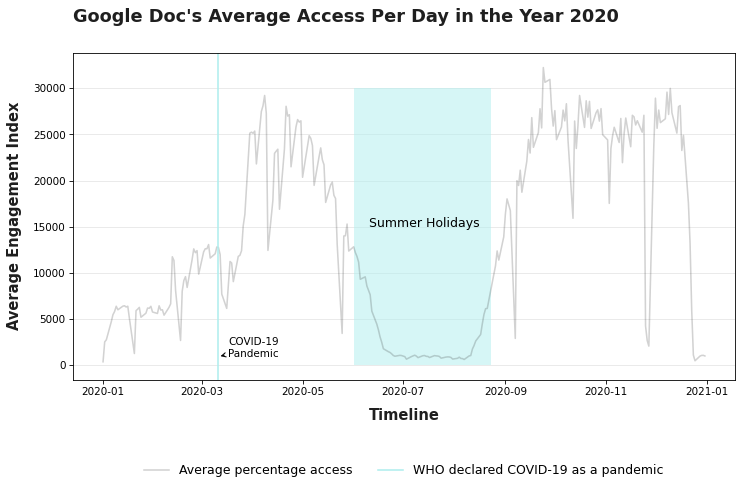

In [ ]:
merged_engagement_and_product_data['weekday'] = pd.DatetimeIndex(merged_engagement_and_product_data['time']).weekday
without_weekends = merged_engagement_and_product_data[merged_engagement_and_product_data.weekday < 5]

df = without_weekends[without_weekends['Product Name'] == 'Google Docs'].groupby('time').mean().reset_index()[['time', 'pct_access', 'engagement_index']]

fig, ax = plt.subplots(figsize=(10, 7), dpi=75)

summer = np.arange(np.datetime64("2020-06-01"), np.datetime64("2020-08-24"))
ax.fill_between(summer, 30000, color='#AFEEEE', alpha=0.5, zorder=2, linewidth=0)

line0 = ax.plot(df['time'], df['engagement_index'], color="#1F1F1F", alpha=0.2, label="Average percentage access")

who_line = plt.axvline(x = pd.Timestamp('2020-03-11'), color="#AFEEEE", label="WHO declared COVID-19 as a pandemic")

ax.annotate("COVID-19\nPandemic", 
             xy=(np.datetime64("2020-03-11"), 900), 
             xytext=(np.datetime64("2020-03-17"), 900), 
             arrowprops=dict(arrowstyle="->"), fontsize=10)
ax.annotate("Summer Holidays", 
             xy=(np.datetime64("2020-06-10"), 15000), 
             xytext=(np.datetime64("2020-06-10"), 15000), 
             fontsize=12)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Timeline", fontsize=14, labelpad=10, color="#1F1F1F", fontweight='bold')
ax.set_ylabel("Average Engagement Index", fontsize=14, labelpad=10, color="#1F1F1F", fontweight='bold')

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)

plt.text(s="Google Doc's Average Access Per Day in the Year 2020", ha='left', x=xmin, y=ymax*1.1, fontsize=17, color="#1F1F1F", fontweight='bold')

plt.tight_layout()
plt.savefig('google_docs.png', dpi=300, bbox_inches='tight', pad_inches=.5)
plt.show()

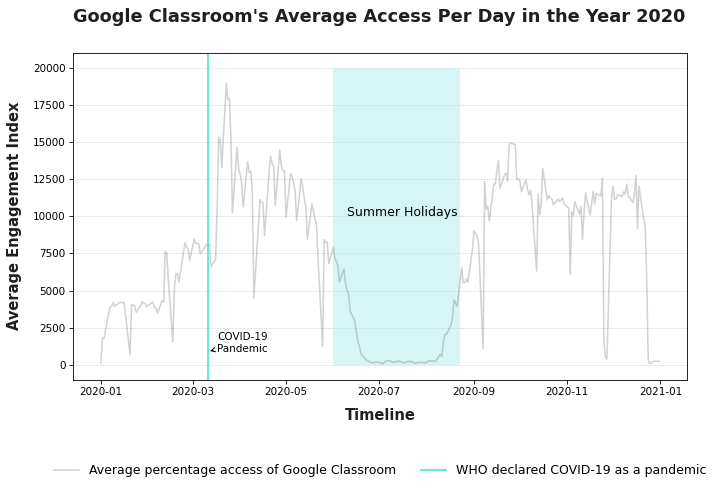

In [ ]:
# merged_engagement_and_product_data['weekday'] = pd.DatetimeIndex(merged_engagement_and_product_data['time']).weekday
# without_weekends = merged_engagement_and_product_data[merged_engagement_and_product_data.weekday < 5]

df = without_weekends[without_weekends['Product Name'] == 'Google Classroom'].groupby('time').mean().reset_index()[['time', 'pct_access', 'engagement_index']]

fig, ax = plt.subplots(figsize=(10, 7), dpi=75)

summer = np.arange(np.datetime64("2020-06-01"), np.datetime64("2020-08-24"))
ax.fill_between(summer, 20000, color='#AFEEEE', alpha=0.5, zorder=2, linewidth=0)

line0 = ax.plot(df['time'], df['engagement_index'], color="#1F1F1F", alpha=0.2, label="Average percentage access of Google Classroom")

who_line = plt.axvline(x = pd.Timestamp('2020-03-11'), color="#40E0D0", label="WHO declared COVID-19 as a pandemic")

ax.annotate("COVID-19\nPandemic", 
             xy=(np.datetime64("2020-03-11"), 900), 
             xytext=(np.datetime64("2020-03-17"), 900), 
             arrowprops=dict(arrowstyle="->"), fontsize=10)
ax.annotate("Summer Holidays", 
             xy=(np.datetime64("2020-06-10"), 10000), 
             xytext=(np.datetime64("2020-06-10"), 10000), 
             fontsize=12)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Timeline", fontsize=14, labelpad=10, color="#1F1F1F", fontweight='bold')
ax.set_ylabel("Average Engagement Index", fontsize=14, labelpad=10, color="#1F1F1F", fontweight='bold')

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)

plt.text(s="Google Classroom's Average Access Per Day in the Year 2020", ha='left', x=xmin, y=ymax*1.1, fontsize=17, color="#1F1F1F", fontweight='bold')


plt.tight_layout()
plt.savefig('google_classroom.png', dpi=300, bbox_inches='tight', pad_inches=.5)
plt.show()

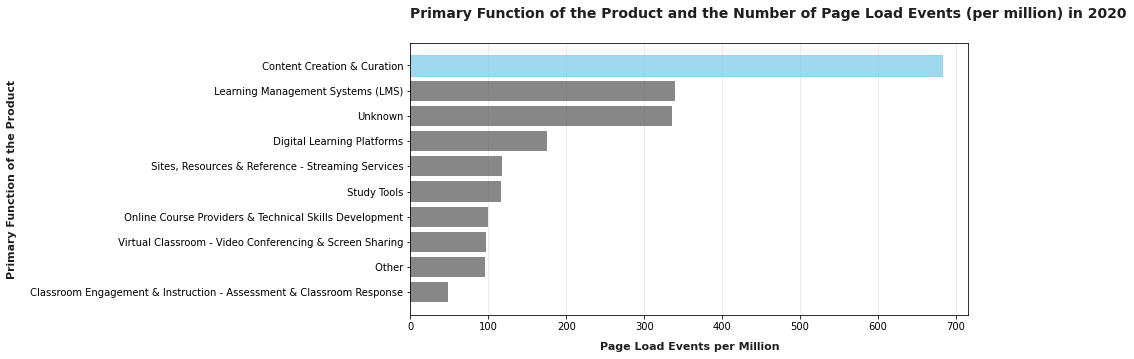

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

temp = pd.DataFrame(merged_engagement_and_product_data.groupby(['secondary_category_function'], dropna=False)['engagement_index'].sum()/1000000).reset_index()
temp.columns = ['category_description', 'engagement_index']
temp = temp.fillna('Unknown')
temp = temp.sort_values('engagement_index', ascending=False)
temp = temp[0:10]
# temp.head()

temp = temp.sort_values('engagement_index')

category = ax.barh(temp['category_description'], temp['engagement_index'], color='#696969', alpha=0.8)

category[9].set_color("#87CEEB")

ax.grid(axis='x', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Page Load Events per Million", fontsize=11, labelpad=10, color="#1F1F1F", fontweight='bold')
ax.set_ylabel("Primary Function of the Product", fontsize=11, labelpad=10, color="#1F1F1F", fontweight='bold')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Primary Function of the Product and the Number of Page Load Events (per million) in 2020", ha='left', x=xmin, y=ymax*1.1, fontsize=14, color="#1F1F1F", fontweight='bold')
plt.savefig('category.png', dpi=300, bbox_inches='tight', pad_inches=.5)
plt.show()

In [ ]:
districts_info.groupby('state').count()

,district_id,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
state,,,,,,
Arizona,1,1,1,0,1,0
California,12,12,12,12,12,0
Connecticut,30,30,30,30,26,0
District Of Columbia,3,3,3,0,3,3
Florida,1,1,1,1,1,1
Illinois,18,18,18,18,18,18
Indiana,7,7,7,7,7,7
Massachusetts,21,21,21,0,17,21
Michigan,2,2,2,2,2,2


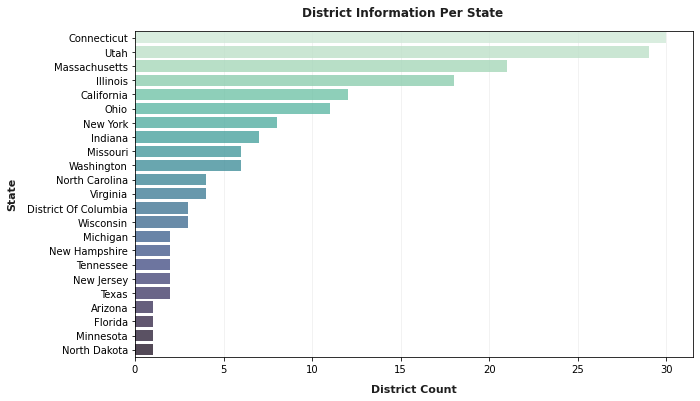

In [ ]:
#Districts per state 
fig, ax = plt.subplots(figsize=(10, 6))
palette = sns.color_palette("mako", n_colors=25)
palette.reverse()
p = sns.countplot(y='state',data=districts_info,order=districts_info.state.value_counts().index ,palette=palette ,alpha=0.8)
ax.grid(axis='x', alpha=0.2)
ax.set_axisbelow(True)
ax.set_xlabel("District Count", fontsize=11, labelpad=10, color="#1F1F1F", fontweight='bold')
ax.set_ylabel("State", fontsize=11, labelpad=10, color="#1F1F1F", fontweight='bold')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="District Information Per State", x=xmax*0.3, y=ymax*3, fontsize=12, color="#1F1F1F", fontweight='bold')
fig.show()
fig.savefig('state_data.jpeg',dpi=300,bbox_inches='tight',pad_inches=0.5)
plt.show()

In [ ]:
merged_data = pd.merge(merged_engagement_data,districts_info, on="district_id")
merged_data.head(5)
del merged_data['pct_black/hispanic']
del merged_data['pct_free/reduced']
del merged_data['pp_total_raw']
del merged_data['county_connections_ratio']
merged_data.head(5)

,time,lp_id,pct_access,engagement_index,district_id,state,locale
0,2020-01-27,32213.0,100.00,3000.00,8815,Illinois,Suburb
1,2020-02-25,90153.0,33.33,2666.67,8815,Illinois,Suburb
2,2020-02-25,99916.0,0.00,NaN,8815,Illinois,Suburb
3,2020-02-25,28504.0,0.00,NaN,8815,Illinois,Suburb
4,2020-02-25,95731.0,33.33,333.33,8815,Illinois,Suburb


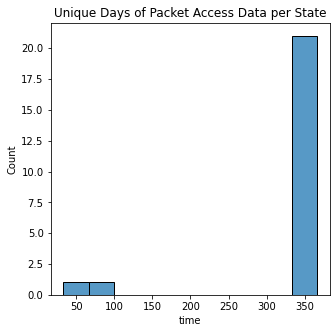

In [ ]:
merged_data.isna().sum()
merged_data_copy = merged_data.copy()

fig, ax = plt.subplots(figsize=(5,5))
sns.histplot(merged_data.groupby('state').time.nunique(), bins=10 ,palette='YlOrBr')
ax.set_title('Unique Days of Packet Access Data per State')
plt.show()

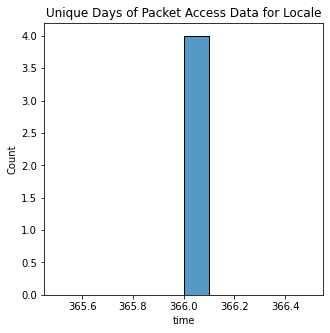

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.histplot(merged_data.groupby('locale').time.nunique(), bins=10 ,palette='YlOrBr')
ax.set_title('Unique Days of Packet Access Data for Locale')
plt.show()

In [ ]:
merged_data_copy.dropna(subset=['pct_access'])

,time,lp_id,pct_access,engagement_index,district_id,state,locale
0,2020-01-27,32213.0,100.00,3000.00,8815,Illinois,Suburb
1,2020-02-25,90153.0,33.33,2666.67,8815,Illinois,Suburb
2,2020-02-25,99916.0,0.00,NaN,8815,Illinois,Suburb
3,2020-02-25,28504.0,0.00,NaN,8815,Illinois,Suburb
4,2020-02-25,95731.0,33.33,333.33,8815,Illinois,Suburb
...,...,...,...,...,...,...,...
17435739,2020-12-31,43009.0,0.02,8.14,7164,California,City
17435740,2020-12-31,62984.0,0.00,0.04,7164,California,City
17435741,2020-12-31,90014.0,0.00,0.04,7164,California,City
17435742,2020-12-31,61945.0,0.29,16.06,7164,California,City


In [ ]:
state = merged_data_copy.groupby('state').time.nunique()
state = state[state>=365]
state=list(state.index)
merged_data_copy = merged_data_copy[merged_data_copy.state.isin(state)]
merged_data_copy.shape

(17404443, 7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


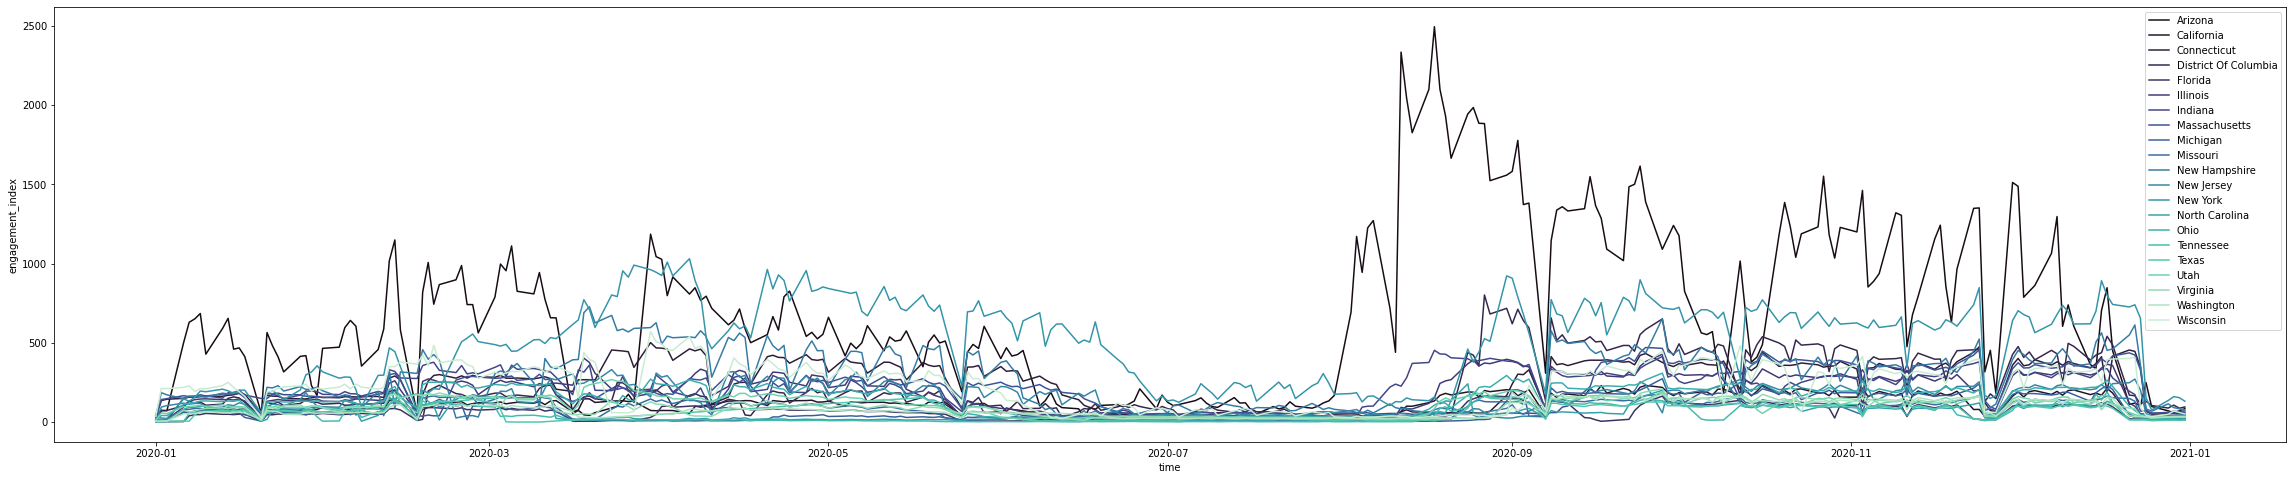

In [ ]:
# Remove weekends from the dataframe
merged_data_copy['weekday'] = pd.DatetimeIndex(merged_data_copy['time']).weekday
merged_data_copy_without_weekends = merged_data_copy[merged_data_copy.weekday < 5]
merged_data_copy_without_weekends['time'] = pd.to_datetime(merged_data_copy_without_weekends['time'])
# packet access
# f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
# temp = merged_data_copy_without_weekends.groupby('time').pct_access.mean().to_frame().reset_index(drop=False)
# sns.lineplot(x=temp.time, y=temp.pct_access, label='packet access')
# sns.color_palette("mako", as_cmap=True)
# plt.legend()
# plt.show()

#packet access with state 
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(40, 8))
sns.color_palette("mako", as_cmap=True)
colors=sns.color_palette("mako",n_colors=len(state))
for i in range(0,len(state)):
    temp = merged_data_copy_without_weekends[merged_data_copy_without_weekends.state == state[i]].groupby('time').engagement_index.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=temp.time, y=temp.engagement_index, label=state[i], color=colors[i] )
    



# plt.text(s="District Information Per State",)

plt.show()    
#plt.legend()
plt.show()


In [ ]:
colors=sns.color_palette("mako",n_colors=30)
colors

[(0.07812339, 0.03677446, 0.06403249),
 (0.1097942, 0.06227277, 0.10959847),
 (0.14079223, 0.08542126, 0.15659379),
 (0.17243586, 0.11091443, 0.21221911),
 (0.19662307, 0.13421303, 0.26383543),
 (0.21690827, 0.15848519, 0.31694355),
 (0.2332454, 0.18380872, 0.37127514),
 (0.2467815, 0.21348266, 0.43393244),
 (0.25353152, 0.24136961, 0.49001976),
 (0.2523226, 0.27269346, 0.54085315),
 (0.24285591, 0.30819938, 0.57913247),
 (0.2284748, 0.35071512, 0.6044784),
 (0.21806257, 0.38817169, 0.61709794),
 (0.21165312, 0.42455441, 0.62568371),
 (0.20849798, 0.46005094, 0.63315928),
 (0.20578999, 0.49953341, 0.64222457),
 (0.20401238, 0.53450825, 0.65048638),
 (0.20349089, 0.56950304, 0.65842151),
 (0.20544449, 0.60456387, 0.66555409),
 (0.21298582, 0.64404072, 0.67208182),
 (0.22673713, 0.67906542, 0.67620044),
 (0.24863372, 0.71392166, 0.67854868),
 (0.27822463, 0.74860229, 0.67914468),
 (0.32733158, 0.78640315, 0.67761027),
 (0.39579804, 0.81654592, 0.67656899),
 (0.48769865, 0.84092197, 0.68552698),
 (0.57888639, 0.86256715, 0.70802931),
 (0.67097934, 0.88687758, 0.74631123),
 (0.74331358, 0.90958151, 0.79244474),
 (0.80885107, 0.93395528, 0.84485982)]

In [ ]:
income_and_food_data = pd.DataFrame(pd.read_excel("/content/income_and_food_sufficiency_data.xlsx"))
# income_and_food_data.head()

In [ ]:
state_and_engagement_index = merged_data[['engagement_index', 'state']].copy()
state_and_engagement_index = pd.DataFrame(state_and_engagement_index.groupby(['state'], dropna=False)['engagement_index'].sum()/1000000).reset_index()
state_and_engagement_index.columns = ['state', 'engagement_index']
# state_and_engagement_index.head()

In [ ]:
income_and_food_data = pd.merge(income_and_food_data,state_and_engagement_index, on="state")
income_and_food_data = income_and_food_data[income_and_food_data['engagement_index'].notna()]
income_and_food_data['avg_food_insufficiency'] = income_and_food_data[['food_insufficiency_1', 'food_insufficiency_2']].mean(axis=1)
# income_and_food_data.head()

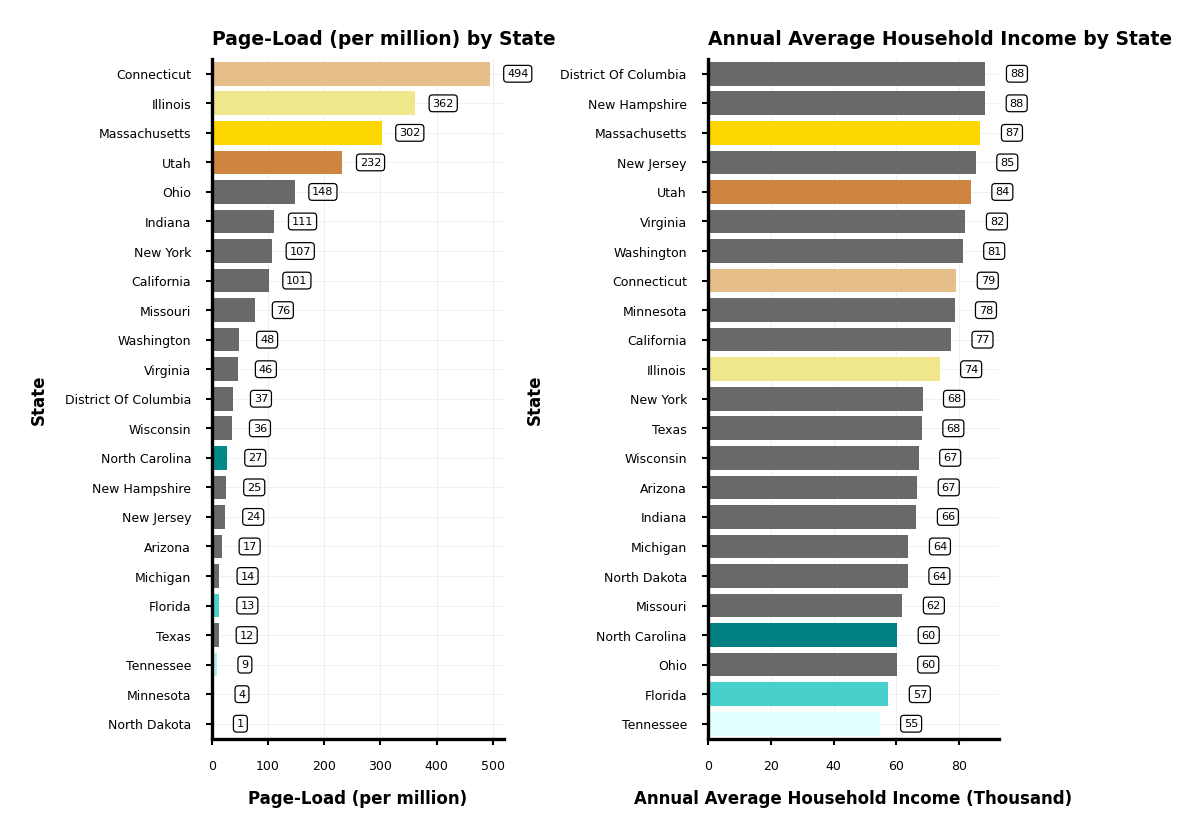

In [ ]:
import matplotlib.ticker as ticker

##########ENGAGEMENT INDEX##########

temp = income_and_food_data.sort_values('engagement_index', ascending=False)

plt.rcParams['figure.dpi'] = 400
fig = plt.figure(figsize=(3, 3), facecolor='#FFFFFF', dpi=300)
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.7, hspace=0.1)

background_color = "#FFFFFF"
color_map = ["dimgray" for _ in range(75)]
color_map[20] = "#AFEEEE"
color_map[18] = "#48D1CC"
color_map[13] = "#008B8B"

color_map[0] = "#E6BE8A"
color_map[1] = "#F0E68C"
color_map[2] = "#FFD700"
color_map[3] = "#CD853F"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0:2, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
#graph
ax0_sns = sns.barplot(ax=ax0, y=temp['state'], x=temp['engagement_index'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.2)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.2)

#format axis
ax0_sns.set_xlabel("Page-Load (per million)",fontsize=4, weight='bold')
ax0_sns.set_ylabel("State",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1*3, 'Page-Load (per million) by State', fontsize=4.5, ha='left', va='top', weight='bold')
# ax0.text(x0, y1*1.9, 'bdhjsbd', fontsize=3, ha='left', va='top')

# data label
for p in ax0.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=2.7, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
x_format = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
ax0.xaxis.set_major_formatter(x_format)

##########HOUSEHOLD INCOME##########

temp = income_and_food_data.sort_values('avg_household_income', ascending=False)

background_color = "#FFFFFF"
color_map = ["dimgray" for _ in range(75)]
color_map[22] = "#E0FFFF"
color_map[21] = "#48D1CC"
color_map[19] = "#008080"

color_map[7] = "#E6BE8A"
color_map[10] = "#F0E68C"
color_map[2] = "#FFD700"
color_map[4] = "#CD853F"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0:2, 1])
plt.subplots_adjust(right=1.0)
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
#graph
ax0_sns = sns.barplot(ax=ax0, y=temp['state'], x=temp['avg_household_income']/1000, 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.2)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.2)

#format axis
ax0_sns.set_xlabel("Annual Average Household Income (Thousand)",fontsize=4, weight='bold')
ax0_sns.set_ylabel("State",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1*3, 'Annual Average Household Income by State', fontsize=4.5, ha='left', va='top', weight='bold')
# ax0.text(x0, y1*1.9, 'fjdfdb', fontsize=3, ha='left', va='top')

# data label
for p in ax0.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 10
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=2.7, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
x_format = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
ax0.xaxis.set_major_formatter(x_format)

plt.savefig('income.jpeg', dpi=300, bbox_inches='tight', pad_inches=.1)

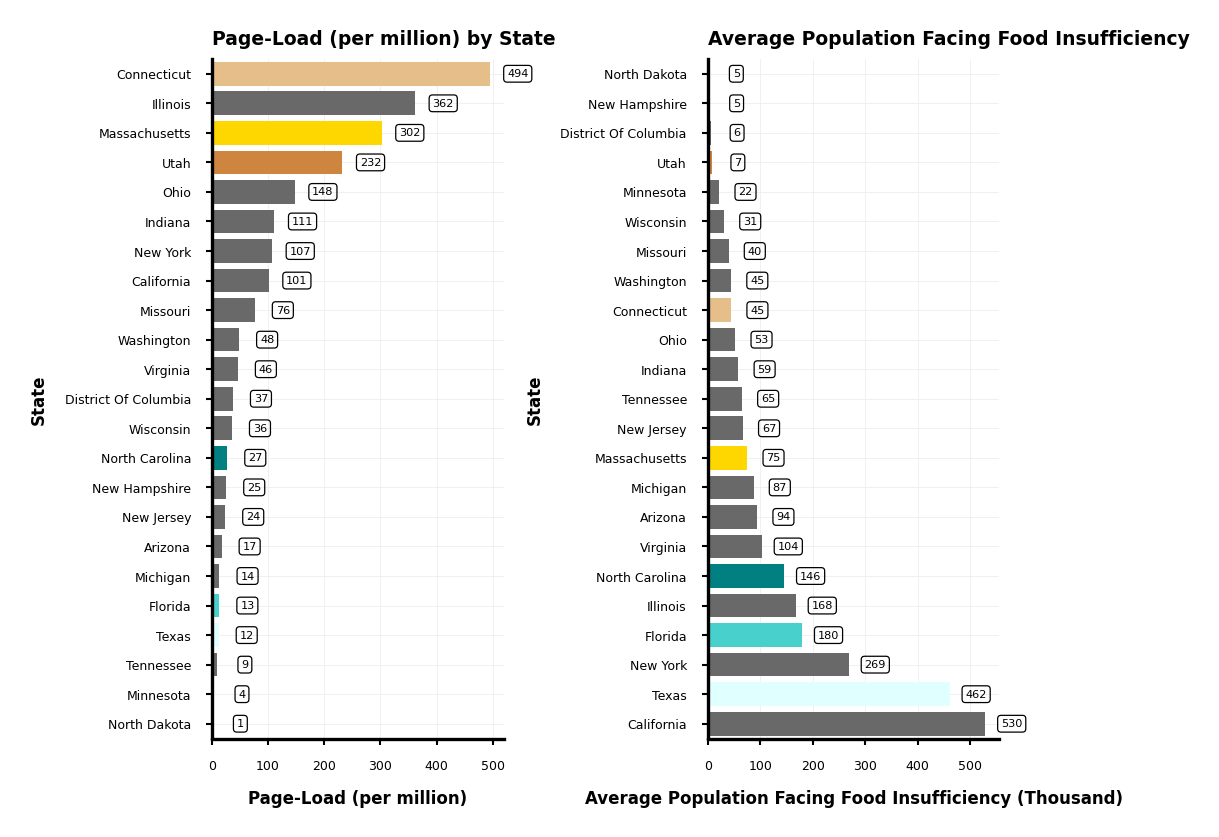

In [ ]:
import matplotlib.ticker as ticker
from pylab import savefig

##########ENGAGEMENT INDEX##########

temp = income_and_food_data.sort_values('engagement_index', ascending=False)

plt.rcParams['figure.dpi'] = 400
fig = plt.figure(figsize=(3, 3), facecolor='#FFFFFF', dpi=300)
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.7, hspace=0.1)

background_color = "#FFFFFF"
color_map = ["dimgray" for _ in range(75)]
color_map[19] = "#E0FFFF"
color_map[18] = "#48D1CC"
color_map[13] = "#008080"

color_map[0] = "#E6BE8A"
# color_map[1] = "#F0E68C"
color_map[2] = "#FFD700"
color_map[3] = "#CD853F"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0:2, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
#graph
ax0_sns = sns.barplot(ax=ax0, y=temp['state'], x=temp['engagement_index'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.2)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.2)

#format axis
ax0_sns.set_xlabel("Page-Load (per million)",fontsize=4, weight='bold')
ax0_sns.set_ylabel("State",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1*3, 'Page-Load (per million) by State', fontsize=4.5, ha='left', va='top', weight='bold')
# ax0.text(x0, y1*1.9, 'bdhjsbd', fontsize=3, ha='left', va='top')

# data label
for p in ax0.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=2.7, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
x_format = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
ax0.xaxis.set_major_formatter(x_format)

##########FOOD INSUFFICIENCY ANALYSIS##########

temp = income_and_food_data.sort_values('avg_food_insufficiency', ascending=True)

background_color = "#FFFFFF"
color_map = ["dimgray" for _ in range(75)]
color_map[21] = "#E0FFFF"
color_map[19] = "#48D1CC"
color_map[17] = "#008080"

color_map[8] = "#E6BE8A"
# color_map[1] = "#F0E68C"
color_map[13] = "#FFD700"
color_map[3] = "#CD853F"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0:2, 1])
plt.subplots_adjust(right=1.0)
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
#graph
ax0_sns = sns.barplot(ax=ax0, y=temp['state'], x=temp['avg_food_insufficiency']/1000, 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.2)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.2)

#format axis
ax0_sns.set_xlabel("Average Population Facing Food Insufficiency (Thousand)",fontsize=4, weight='bold')
ax0_sns.set_ylabel("State",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1*3, 'Average Population Facing Food Insufficiency', fontsize=4.5, ha='left', va='top', weight='bold')
# ax0.text(x0, y1*1.9, 'fjdfdb', fontsize=3, ha='left', va='top')

# data label
for p in ax0.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='center', va='center', fontsize=2.7, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
x_format = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
ax0.xaxis.set_major_formatter(x_format)
# plt.savefig('food_insufficiency.jpeg', dpi=300, bbox_inches='tight', pad_inches=.5)
# figure = fig.get_figure()    
plt.savefig('food_insufficiency.png', dpi=500, bbox_inches='tight', pad_inches=.1)

# Preprocessing - part two for LSTM, Policy and Percentage Student Engagement Trend

In [13]:
!pip install plotly --upgrade
import plotly
print(plotly.__version__)

5.4.0


In [2]:
!git clone https://github.com/raghudv94/Data_Mining_dataset.git

Cloning into 'Data_Mining_dataset'...
remote: Enumerating objects: 261, done.
remote: Counting objects: 100% (261/261), done.
remote: Compressing objects: 100% (261/261), done.
remote: Total 261 (delta 7), reused 235 (delta 0), pack-reused 0
Receiving objects: 100% (261/261), 121.15 MiB | 13.69 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Checking out files: 100% (244/244), done.


In [3]:
!pip install seaborn --upgrade
import seaborn
print(seaborn.__version__)

0.11.2


In [14]:
# Import Statements
import os
import csv      
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import glob
import re

'''Libraries to manipulate data'''
import math
import copy

'''Labraries for Data Visualization'''
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objs as go 
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff


In [15]:
file_path_products = 'Data_Mining_dataset/products_info.csv'
products_info= pd.read_csv(file_path_products, sep=',')

file_path_districts = 'Data_Mining_dataset/districts_info.csv'
districts_info= pd.read_csv(file_path_districts, sep=',')


In [16]:
# Preprocessing district info

# Dropping districts with NaN states
districts_info = districts_info[districts_info.state.notna()].reset_index(drop=True)

# Drop column county_connections_ratio which does not contain any valuable information
districts_info = districts_info.drop('county_connections_ratio', axis=1)

def replace_ranges_pct(range_str):
    if range_str == '[0, 0.2[':
        return 0.1
    elif range_str == '[0.2, 0.4[':
        return 0.3
    elif range_str == '[0.4, 0.6[':
        return 0.5
    elif range_str == '[0.6, 0.8[':
        return 0.7
    elif range_str == '[0.8, 1[':
        return 0.9
    else:

        return np.nan
    
districts_info['pct_black/hispanic'] = districts_info['pct_black/hispanic'].apply(lambda x: replace_ranges_pct(x))
districts_info['pct_free/reduced'] = districts_info['pct_free/reduced'].apply(lambda x: replace_ranges_pct(x))

# Replace state strings with abbreviations
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

districts_info['state'] = districts_info['state'].replace(us_state_abbrev)
districts_info

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw
0,8815,IL,Suburb,0.1,0.1,"[14000, 16000["
1,4921,UT,Suburb,0.1,0.3,"[6000, 8000["
2,5987,WI,Suburb,0.1,0.1,"[10000, 12000["
3,3710,UT,Suburb,0.1,0.5,"[6000, 8000["
4,7177,NC,Suburb,0.3,0.3,"[8000, 10000["
...,...,...,...,...,...,...
171,9515,NY,Rural,0.1,0.5,"[18000, 20000["
172,8103,TN,Rural,0.3,NaN,"[8000, 10000["
173,4929,VA,Rural,0.1,0.5,"[12000, 14000["
174,7975,CA,City,0.7,0.7,NaN


In [22]:
# Preprocessing product info data

# Convert column names to lower case and replace spaces with underscores
products_info.columns = [f"{re.sub(' ', '_', col.lower())}" for col in products_info.columns]

# Splitting up the primary essential functions
products_info['primary_function_main'] = products_info['primary_essential_function'].apply(lambda x: x.split(' - ')[0] if x == x else x)
products_info['primary_function_sub'] = products_info['primary_essential_function'].apply(lambda x: x.split(' - ')[1] if x == x else x)

# Synchronize similar values
#products_info['primary_function_sub'] = products_info['primary_function_sub'].replace({'Sites, Resources & References' : 'Sites, Resources & Reference'})
#products_info.drop("primary_essential_function", axis=1, inplace=True)
products_info

,lp_id,url,product_name,provider/company_name,sector(s),primary_essential_function,primary_function_main,primary_function_sub
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si...",LC,"Sites, Resources & Reference"
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms,LC,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms
...,...,...,...,...,...,...,...,...
364,24396,https://www.mathsisfun.com/,Math is Fun,Mathsisfun.com,PreK-12,"LC - Sites, Resources & Reference",LC,"Sites, Resources & Reference"
365,22241,https://www.history.com/,History.com,"A&E Television Networks, LLC",PreK-12; Higher Ed,"LC - Sites, Resources & Reference",LC,"Sites, Resources & Reference"
366,93376,https://www.cultofpedagogy.com/,Cult of Pedagogy,Cult of Pedagogy,PreK-12,CM - Teacher Resources - Professional Learning,CM,Teacher Resources
367,32555,http://www.innersloth.com/gameAmongUs.php,Among Us,InnerSloth,PreK-12; Higher Ed,"LC - Sites, Resources & Reference - Games & Si...",LC,"Sites, Resources & Reference"


In [23]:
###### engagement_data ######
temp = []

for district in (districts_info.district_id.unique()):
    df = pd.read_csv(f'Data_Mining_dataset/engagement_data/{district}.csv', index_col=None, header=0)
    df["district_id"] = district
    if df.time.nunique() == 366:
        temp.append(df)

engagement = pd.concat(temp)
engagement = engagement.reset_index(drop=True)
del temp

In [24]:
# Preprocessing and feature engineering Engagement data
# Convert time
engagement.time = engagement.time.astype('datetime64[ns]')

# Create new features
engagement['cw'] = pd.DatetimeIndex(engagement['time']).week
engagement['weekday'] = pd.DatetimeIndex(engagement['time']).weekday

# Fill NaN in column engagement_index with 0
engagement['engagement_index'] = engagement['engagement_index'].fillna(0)

# Only look at engagement on weekdays
engagement = engagement[engagement.weekday < 5].reset_index(drop=True)

# Resample average data on weekly basis
engagement_cw = engagement.groupby(['cw', 'lp_id', 'district_id'])['pct_access', 'engagement_index'].mean().reset_index(drop=False)

# Covid phase:
# -1 : Summer break
# 0 : Academic year 2019/20 before COVID-19
# 1 : Academic year 2019/20 during COVID-19
# 2 : Academic year 2020/21 during COVID-19
engagement_cw['covid_phase'] = engagement_cw.cw.apply(lambda x: 0 if x < 10 else (2 if x > 35 else (1 if ((x>=10) & (x <=25)) else -1)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [25]:
# Only consider districts with full 2020 engagement data
districts_info = districts_info[districts_info.district_id.isin(engagement.district_id.unique())].reset_index(drop=True)
products_info = products_info[products_info.lp_id.isin(engagement.lp_id.unique())].reset_index(drop=True)

# Only consider engagement data with lp_id in products_info
engagement = engagement[engagement.lp_id.isin(products_info.lp_id.unique())].reset_index(drop=True)
engagement

,time,lp_id,pct_access,engagement_index,district_id,cw,weekday
0,2020-01-01,15254.0,0.21,2.07,3710,1,2
1,2020-01-01,32213.0,0.62,12.40,3710,1,2
2,2020-01-01,16633.0,0.21,2.07,3710,1,2
3,2020-01-01,94324.0,0.21,6.20,3710,1,2
4,2020-01-01,64948.0,0.21,2.07,3710,1,2
...,...,...,...,...,...,...,...
6125968,2020-12-31,28504.0,0.05,10.46,7164,53,3
6125969,2020-12-31,69827.0,0.35,24.81,7164,53,3
6125970,2020-12-31,52758.0,0.01,0.09,7164,53,3
6125971,2020-12-31,61945.0,0.29,16.06,7164,53,3


In [26]:
###### Merge all dataframes to one big dataframe ######
all_data = engagement_cw.merge(products_info[['lp_id', 'product_name', 'primary_function_main', 'primary_function_sub']], on='lp_id')
all_data = all_data.merge(districts_info, on='district_id')
all_data

,cw,lp_id,district_id,pct_access,engagement_index,covid_phase,product_name,primary_function_main,primary_function_sub,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw
0,1,10533.0,1000,0.230,32.540,0,Scholastic,LC,"Sites, Resources & References",CT,Suburb,0.7,0.3,NaN
1,2,10533.0,1000,0.646,66.932,0,Scholastic,LC,"Sites, Resources & References",CT,Suburb,0.7,0.3,NaN
2,3,10533.0,1000,0.186,10.554,0,Scholastic,LC,"Sites, Resources & References",CT,Suburb,0.7,0.3,NaN
3,4,10533.0,1000,0.120,9.054,0,Scholastic,LC,"Sites, Resources & References",CT,Suburb,0.7,0.3,NaN
4,5,10533.0,1000,0.340,31.300,0,Scholastic,LC,"Sites, Resources & References",CT,Suburb,0.7,0.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660190,52,32555.0,9478,0.240,3.040,2,Among Us,LC,"Sites, Resources & Reference",OH,Town,0.1,0.1,NaN
1660191,49,87841.0,9478,0.365,15.855,2,Edpuzzle - Free (Basic Plan),NaN,NaN,OH,Town,0.1,0.1,NaN
1660192,50,87841.0,9478,1.826,62.576,2,Edpuzzle - Free (Basic Plan),NaN,NaN,OH,Town,0.1,0.1,NaN
1660193,51,87841.0,9478,0.365,11.555,2,Edpuzzle - Free (Basic Plan),NaN,NaN,OH,Town,0.1,0.1,NaN


In [27]:
engagement_merged_all = engagement.merge(products_info[['lp_id', 'product_name', 'primary_function_main', 'primary_function_sub']], on='lp_id')
engagement_merged_all = engagement_merged_all.merge(districts_info, on='district_id')
# Covid phase:
# -1 : Summer break
# 0 : Academic year 2019/20 before COVID-19
# 1 : Academic year 2019/20 during COVID-19
# 2 : Academic year 2020/21 during COVID-19
engagement_merged_all['covid_phase'] = engagement_merged_all.cw.apply(lambda x: 0 if x < 10 else (2 if x > 35 else (1 if ((x>=10) & (x <=25)) else -1)))
engagement_merged_all = engagement_merged_all[engagement_merged_all['covid_phase'] != -1].reset_index(drop=True)

# Policy Data - trending

In [28]:
!pip install kaleido --upgrade

     |████████████████████████████████| 79.9 MB 1.3 MB/s 


In [29]:
import copy
import plotly.io as pio

policies = pd.read_csv("Data_Mining_dataset/data.csv")
policies = policies[['POSTCODE','CLSCHOOL']]

engagement_complete_toclean = copy.copy(engagement_merged_all)

engagement_complete_clean = engagement_complete_toclean.dropna(subset=['state'])

engagement_complete_sorted = engagement_complete_clean.sort_values('time')
grouped_by_date = engagement_complete_sorted[['time','pct_access','engagement_index','state']].groupby(['time','state'], as_index=False).mean()
grouped_by_date = grouped_by_date[grouped_by_date['state']!='North Dakota'][grouped_by_date['state']!='North Carolina'][grouped_by_date['state']!='Tennessee'][grouped_by_date['state']!='Texas'][grouped_by_date['state']!='Minnesota']
grouped_by_date['time'] = pd.to_datetime(grouped_by_date["time"])
grouped_by_date = grouped_by_date.set_index('time', drop=False)

cols = []
for _, grp in grouped_by_date.groupby(pd.Grouper(freq="7D", origin="start_day")):
    try:
        states = []
        for state in grp['state']:
            if state not in states:
                cols.append((grp['time'][0], grp[grp['state']==state]['engagement_index'].mean(), state))
                states.append(state)
            else:
                break
    except:
        continue

weekly = pd.DataFrame(cols, columns=['time','engagement_index','state'])
weekly = weekly[weekly['state'].isin(['AZ','CA','CT','FL'])]



#grouped_by_date: by day; weekly: by week
fig = px.line(weekly, x='time', y='engagement_index', facet_col="state", facet_col_wrap=2, facet_col_spacing=0.05, facet_row_spacing=0.1)

fig.update_layout(
    title={
        'text': "Mean Daily Engagement Index per Week - Restriction Policies",
        'y':0.99,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},    
    template='simple_white',
    margin=dict(
        l=8,
        r=16,
        t=24,
        b=24
    ))
"""fig.update_layout(
    title={
        'text': "Mean Daily Engagement Index per Week - Restriction Policies",
        'y':0.99,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})"""
fig.update_yaxes(matches=None, showticklabels=True, title_text='')
fig.update_xaxes(matches=None, showticklabels=True)

fig.layout.xaxis.title = { 
    'font':{
            'color':'blue'
            },
    'text':'- Schools Closed'}

for k in range(len(fig.data)):
    fig.data[k].line.color = 'green'

arr = [[1,1],[1,2],[2,1],[2,2]]
col = 0
row = 0

for k in range(len(fig.data)):
    fig.layout.annotations[k].text = fig.layout.annotations[k].text[6:]
    i = fig.data[k].xaxis
    
    if len(i) > 1:
        i = i[1:]
    else:
        i = 1
    i = int(i)
    #print(i)
    
    state = fig.data[k].hovertemplate.split('<br>')[0][6:]
    if state == 'District Of Columbia':
        state = 'District of Columbia'
    #row = int((row + 1)/2)
    
    #col = int((col) % 2)
    row, col = arr[k]
    
    #print(len(policies[policies['STATE']==state]))

    #if len(policies[policies['STATE']==state]) > 0:
    
    date2 = policies[policies['POSTCODE']==state]['CLSCHOOL'].item()
    if date2 is not np.nan:
        enddate2 = pd.to_datetime(date2) + pd.DateOffset(days=14)
        fig.add_vline(x=date2, line_dash="solid", line_color='blue', line_width=2, row=row, col=col)
        fig.add_vrect(x0=date2, x1=enddate2, row=row, col=col,
                  fillcolor="blue", opacity=0.4, line_width=0)
    #row += 1
    #col += 1
#pio.write_image(fig, "policy_trend.jpeg", width=1.5*300, height=0.75*300, scale=1)
#fig.savefig("policy_trend.jpeg", dpi=300)
#fig.to_image(format="jpeg", engine="orca")    
fig.show()

# Percentage of student engagement - Trend

In [30]:
# Merge school closed info data

policy_sub = policies[['POSTCODE','CLSCHOOL']]
policy_sub = policy_sub.rename(columns = {'POSTCODE': 'state'})
X = engagement_merged_all.merge(policy_sub, how='left', on='state')
X['CLSCHOOL'] = X['CLSCHOOL'].astype('datetime64')
X['school_closed'] = np.where(X['time'] >= X['CLSCHOOL'], 1, 0)
X.pop('CLSCHOOL')
X

,time,lp_id,pct_access,engagement_index,district_id,cw,weekday,product_name,primary_function_main,primary_function_sub,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw,covid_phase,school_closed
0,2020-01-01,15254.0,0.21,2.07,3710,1,2,MIT App Inventor,LC,Content Creation & Curation,UT,Suburb,0.1,0.5,"[6000, 8000[",0,0
1,2020-01-06,15254.0,0.21,6.19,3710,2,0,MIT App Inventor,LC,Content Creation & Curation,UT,Suburb,0.1,0.5,"[6000, 8000[",0,0
2,2020-01-07,15254.0,0.21,134.02,3710,2,1,MIT App Inventor,LC,Content Creation & Curation,UT,Suburb,0.1,0.5,"[6000, 8000[",0,0
3,2020-01-08,15254.0,0.21,129.90,3710,2,2,MIT App Inventor,LC,Content Creation & Curation,UT,Suburb,0.1,0.5,"[6000, 8000[",0,0
4,2020-01-09,15254.0,0.21,61.86,3710,2,3,MIT App Inventor,LC,Content Creation & Curation,UT,Suburb,0.1,0.5,"[6000, 8000[",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290569,2020-12-25,87841.0,0.01,0.42,7164,52,4,Edpuzzle - Free (Basic Plan),NaN,NaN,CA,City,0.7,0.7,NaN,2,1
5290570,2020-12-28,87841.0,0.01,0.75,7164,53,0,Edpuzzle - Free (Basic Plan),NaN,NaN,CA,City,0.7,0.7,NaN,2,1
5290571,2020-12-29,87841.0,0.02,2.19,7164,53,1,Edpuzzle - Free (Basic Plan),NaN,NaN,CA,City,0.7,0.7,NaN,2,1
5290572,2020-12-30,87841.0,0.02,3.82,7164,53,2,Edpuzzle - Free (Basic Plan),NaN,NaN,CA,City,0.7,0.7,NaN,2,1


In [31]:
broadband_path = 'Data_Mining_dataset/broadband_access.csv'
broadband_df = pd.read_csv(broadband_path, delimiter=',')
broadband_df = broadband_df[['state_abr','unemp','health_ins','poverty','SNAP','no_comp','no_internet','home_broad','broad_num','broad_avail']]
broadband_df = broadband_df.rename(columns={'state_abr': 'state'})
broadband_df = broadband_df.groupby('state').mean().reset_index()
broadband_df


,state,unemp,health_ins,poverty,SNAP,no_comp,no_internet,home_broad,broad_num,broad_avail
0,AK,8.320690,19.934483,13.317241,15.875862,11.262069,23.951724,75.655172,5.344828,69.051724
1,AL,3.446269,10.488060,20.337313,17.507463,22.944776,33.577612,65.762687,3.409091,57.825758
2,AR,4.184000,8.637333,19.833333,15.681333,20.741333,35.129333,64.164000,3.786667,60.314667
3,AZ,6.446667,11.640000,20.000000,15.953333,16.613333,27.780000,71.726667,3.333333,59.046667
4,CA,5.098276,7.808621,15.020690,10.517241,10.837931,18.086207,81.350000,4.982759,76.705172
5,CO,2.843750,9.751563,13.062500,10.128125,11.737500,20.389063,78.782813,3.984375,71.407813
6,CT,3.625000,4.637500,9.162500,11.075000,10.112500,15.450000,84.125000,4.375000,98.837500
7,DC,5.500000,4.000000,16.800000,13.900000,10.200000,19.700000,80.000000,3.000000,95.100000
8,DE,3.900000,6.466667,12.233333,12.733333,10.500000,17.666667,81.900000,3.000000,97.833333
9,FL,3.477612,13.434328,16.589552,15.311940,14.880597,24.301493,75.010448,5.328358,82.095522


In [32]:
X = X.merge(broadband_df, how='left', on='state')
covid_st_path = 'Data_Mining_dataset/covid_state_wise.csv'
covid_st_df = pd.read_csv(covid_st_path, delimiter=',')
covid_st_df['date'] = covid_st_df.date.astype('datetime64[ns]')
covid_st_df['state'] = covid_st_df['state'].replace(us_state_abbrev)
covid_st_df = covid_st_df[['date','state','cases','deaths']]
covid_st_df = covid_st_df.rename(columns={'date': 'time'})
#covid_st_df = covid_st_df.groupby('state').mean().reset_index()
X = X.merge(covid_st_df, how='left', on=['state','time'])
# Fill NaN in column engagement_index with 0
X['cases'] = X['cases'].fillna(0)
X['deaths'] = X['deaths'].fillna(0)
covid_pct = X[['time','district_id','cw','pct_access','cases']]
covid_pct_1 = covid_pct.groupby(['time','district_id','cw']).sum().reset_index()
covid_pct_2 = covid_pct_1.groupby(['cw']).mean().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



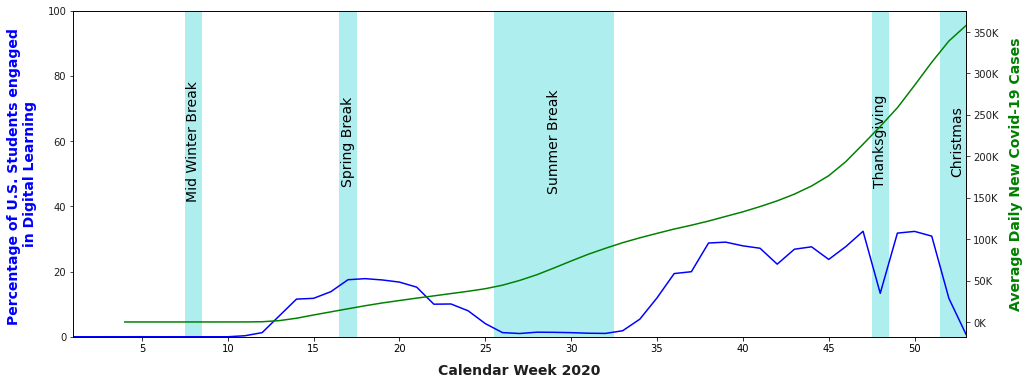

In [33]:
from matplotlib.patches import Rectangle
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
###### us_covid19_daily ######

us_covid = pd.read_csv("Data_Mining_dataset/covid_state_wise.csv")

us_covid['date'] = us_covid.date.astype('datetime64[ns]')
us_covid = us_covid[us_covid['date'] < '2021-01-01']
us_covid['cw'] = pd.DatetimeIndex(us_covid['date']).week

us_covid = us_covid.sort_values(by='date')
us_covid['new_cases'] = us_covid['cases']

us_covid = us_covid.groupby('cw')[['new_cases']].mean().reset_index(drop=False)

# Visualize
virtual_classroom_lp_id = products_info[products_info.primary_function_sub == 'Virtual Classroom'].lp_id.unique()

engagement_sum = engagement_cw[engagement_cw.lp_id.isin(virtual_classroom_lp_id)].groupby(['cw', 'district_id']).pct_access.sum().to_frame().reset_index()

# visualize 
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
temp = engagement_sum.groupby('cw').pct_access.mean().to_frame().reset_index(drop=False)
sns.lineplot(x=temp.cw, y=temp.pct_access, label=f'Virtual Classroom pct_access', color= 'blue', legend=False)
ax.set_ylim([0, 100])  
ax.set_xlim([1, 53])  

ax2 = ax.twinx()
sns.lineplot(x=us_covid.cw, y=us_covid.new_cases, ax=ax2, label = 'Avg. Weekly New Covid Cases', color= 'green',legend=False)
#ax2.set_ylim([0, 200000])  "#1F1F1F"

# https://www.mykidstime.com/school/here-are-the-school-holidays-2019/
# https://www.edarabia.com/school-holidays-united-states/
# Mid Winter Break
ax.add_patch(Rectangle((7.5, 0), 1, 100, fill=True, color="#AFEEEE", lw=0))
ax.annotate('Mid Winter Break', xy=(8, 60), fontsize=14, color='black', rotation=90, va='center', ha='center')

# Spring Break
ax.add_patch(Rectangle((16.5, 0), 1, 100, fill=True, color="#AFEEEE", lw=0))
ax.annotate('Spring Break', xy=(17, 60), fontsize=14, color='black', rotation=90, va='center', ha='center')

# Summer Break
ax.add_patch(Rectangle((25.5, 0), 7, 100, fill=True, color="#AFEEEE", lw=0))
ax.annotate('Summer Break', xy=(29, 60), fontsize=14, color='black', rotation=90, va='center', ha='center')

# Thanksgiving
ax.add_patch(Rectangle((47.5, 0), 1, 100, fill=True, color="#AFEEEE", lw=0))
ax.annotate('Thanksgiving', xy=(48, 60), fontsize=14, color='black', rotation=90, va='center', ha='center')

# Christmas
ax.add_patch(Rectangle((51.5, 0), 3, 100, fill=True, color="#AFEEEE", lw=0))
ax.annotate('Christmas', xy=(52.5, 60), fontsize=14, color='black', rotation=90, va='center', ha='center')

ax.set_xlabel('Calendar Week 2020', fontsize=14, labelpad=10, color="#1F1F1F", fontweight='bold')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.set_ylabel('Percentage of U.S. Students engaged \nin Digital Learning', fontsize=14, labelpad=10, color="blue", fontweight='bold')
ax.tick_params(axis='y', colors = "#1F1F1F")

ax2.set_ylabel('Average Daily New Covid-19 Cases', color="green", fontsize=14, labelpad=10, fontweight='bold')
ax2.tick_params(axis='y', colors = "#1F1F1F")
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.savefig("engagement_covid_trend.jpeg", dpi=300)
plt.show()

# LSTM

In [34]:
X_sub = X[['cw','state','pct_black/hispanic','pct_free/reduced','covid_phase','school_closed','unemp','health_ins','poverty','SNAP','no_comp','no_internet','home_broad','broad_num','broad_avail','cases','deaths']]
Y_sub = X[['cw','state','engagement_index']]
summ_data = X[['cw','state', 'engagement_index', 'pct_black/hispanic','pct_free/reduced','covid_phase','school_closed','unemp','health_ins','poverty','SNAP','no_comp','no_internet','home_broad','broad_num','broad_avail','cases','deaths']]

In [35]:
x_data = X_sub.groupby(['state','cw']).mean().reset_index()
y_data = Y_sub.groupby(['state','cw']).mean().reset_index()
summ_data = summ_data.groupby(['state','cw']).mean().reset_index()

x_data['pct_free/reduced'] = x_data['pct_free/reduced'].fillna(0)
summ_data['pct_free/reduced'] = summ_data['pct_free/reduced'].fillna(0)
x_data

,state,cw,pct_black/hispanic,pct_free/reduced,covid_phase,school_closed,unemp,health_ins,poverty,SNAP,no_comp,no_internet,home_broad,broad_num,broad_avail,cases,deaths
0,AZ,1,0.900000,0.000000,0.0,0.0,6.446667,11.640000,20.000000,15.953333,16.613333,27.780000,71.726667,3.333333,59.046667,0.000000,0.000000
1,AZ,2,0.900000,0.000000,0.0,0.0,6.446667,11.640000,20.000000,15.953333,16.613333,27.780000,71.726667,3.333333,59.046667,0.000000,0.000000
2,AZ,3,0.900000,0.000000,0.0,0.0,6.446667,11.640000,20.000000,15.953333,16.613333,27.780000,71.726667,3.333333,59.046667,0.000000,0.000000
3,AZ,4,0.900000,0.000000,0.0,0.0,6.446667,11.640000,20.000000,15.953333,16.613333,27.780000,71.726667,3.333333,59.046667,0.000000,0.000000
4,AZ,5,0.900000,0.000000,0.0,0.0,6.446667,11.640000,20.000000,15.953333,16.613333,27.780000,71.726667,3.333333,59.046667,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,WA,49,0.401204,0.551411,2.0,1.0,5.676923,7.879487,14.241026,14.723077,10.697436,18.574359,80.635897,5.128205,82.625641,177607.851878,2980.887830
813,WA,50,0.401434,0.551775,2.0,1.0,5.676923,7.879487,14.241026,14.723077,10.697436,18.574359,80.635897,5.128205,82.625641,197984.392614,3099.895303
814,WA,51,0.402306,0.551898,2.0,1.0,5.676923,7.879487,14.241026,14.723077,10.697436,18.574359,80.635897,5.128205,82.625641,217333.508989,3136.525513
815,WA,52,0.424328,0.563246,2.0,1.0,5.676923,7.879487,14.241026,14.723077,10.697436,18.574359,80.635897,5.128205,82.625641,234108.251658,3231.567190


In [36]:
y_data = y_data[['engagement_index']]
x_temp = x_data.drop(columns=['state','cw'])
summ_data = summ_data.drop(columns=['state','cw'])

In [37]:
from sklearn.preprocessing import MinMaxScaler

train = summ_data.drop(columns='engagement_index')
scalers={}
for i in summ_data.columns.drop('engagement_index'):
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
train['engagement_index'] = summ_data['engagement_index']

In [38]:
# multivariate data preparation
from numpy import array

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [39]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(train, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

In [40]:
# choose a number of time steps
n_steps = 3
# convert into input/output
X_in, y_out = split_sequences(df_train.to_numpy(), n_steps)
print(X_in.shape, y_out.shape)

# univariate bidirectional lstm example
from numpy import array
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, LeakyReLU, ReLU
from keras.layers import Dense
from keras.layers import Bidirectional

# define model
n_features = 15
# define model
model_2 = Sequential()
model_2.add(Bidirectional(LSTM(2028, activation='relu'), input_shape=(n_steps, n_features)))
model_2.add(LeakyReLU(alpha=0.5))
model_2.add(Dense(512))
model_2.add(ReLU())
model_2.add(Dense(1))

lr_list = [0.001]

for lr in lr_list:

    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model_2.compile(optimizer=opt, loss='mse')
    # fit model
    history = model_2.fit(X_in, y_out, epochs=1000)

(569, 3, 15) (569,)
Epoch 1/1000
18/18 [==============================] - 5s 59ms/step - loss: 78656.9531
Epoch 2/1000
18/18 [==============================] - 1s 54ms/step - loss: 28765.4121
Epoch 3/1000
18/18 [==============================] - 1s 53ms/step - loss: 22720.3145
Epoch 4/1000
18/18 [==============================] - 1s 54ms/step - loss: 20330.1582
Epoch 5/1000
18/18 [==============================] - 1s 54ms/step - loss: 19521.0586
Epoch 6/1000
18/18 [==============================] - 1s 53ms/step - loss: 20969.6445
Epoch 7/1000
18/18 [==============================] - 1s 54ms/step - loss: 17722.1172
Epoch 8/1000
18/18 [==============================] - 1s 53ms/step - loss: 20450.7461
Epoch 9/1000
18/18 [==============================] - 1s 55ms/step - loss: 16800.8086
Epoch 10/1000
18/18 [==============================] - 1s 54ms/step - loss: 20936.4004
Epoch 11/1000
18/18 [==============================] - 1s 54ms/step - loss: 17732.3145
Epoch 12/1000
18/18 [===========

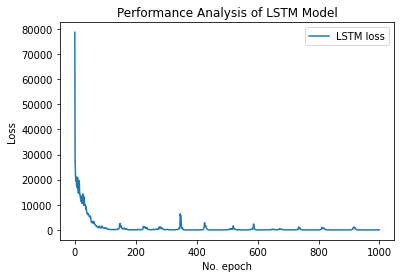

In [41]:
import matplotlib.pyplot as plt

# Plot history: MAE
plt.plot(history.history['loss'], label='LSTM loss')
#plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('Performance Analysis of LSTM Model')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.savefig('loss_lstm.jpeg', dpi=300, bbox_inches='tight')
plt.show()


In [42]:
# choose a number of time steps
n_steps = 3
# convert into input/output
X_test_2, y_test_2 = split_sequences(df_test.to_numpy(), n_steps)
print(X_test_2.shape, y_test_2.shape)
predicted_value = model_2.predict(X_test_2)
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(predicted_value,y_test_2))

import sklearn
r2 = sklearn.metrics.mean_squared_error(predicted_value, y_test_2, squared=False)
print(r2)

(244, 3, 15) (244,)
113.79126033270109
182.33629598890948
